In [1]:
import networkx as nx
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g1 = nx.read_gml('graph_terrorists.gml')
g2 = nx.read_gml('graph_polblog.gml')
g3 = nx.read_gml('graph_jazz_collab.gml')
g4 = nx.read_graphml('Florida_foodweb.graphml')

# A03.1 Centrality correlations

In [3]:
def centrality_measures(g):
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    key = ['degree','closeness','betweeness','eigenvector']
    cenrtality=[degree_cen,close_cen,between_cen,eigen_cen]
    cen = zip(key,cenrtality)
    return dict(cen)

In [4]:
centrality_measures(g1)

{'degree': {'0': 0.01639344262295082,
  '1': 0.18032786885245902,
  '2': 0.01639344262295082,
  '3': 0.01639344262295082,
  '4': 0.03278688524590164,
  '5': 0.06557377049180328,
  '6': 0.03278688524590164,
  '7': 0.04918032786885246,
  '8': 0.03278688524590164,
  '9': 0.09836065573770492,
  '10': 0.04918032786885246,
  '11': 0.36065573770491804,
  '12': 0.0819672131147541,
  '13': 0.06557377049180328,
  '14': 0.03278688524590164,
  '15': 0.11475409836065574,
  '16': 0.04918032786885246,
  '17': 0.13114754098360656,
  '18': 0.04918032786885246,
  '19': 0.01639344262295082,
  '20': 0.01639344262295082,
  '21': 0.01639344262295082,
  '22': 0.06557377049180328,
  '23': 0.03278688524590164,
  '24': 0.1639344262295082,
  '25': 0.03278688524590164,
  '26': 0.0819672131147541,
  '27': 0.06557377049180328,
  '28': 0.0819672131147541,
  '29': 0.13114754098360656,
  '30': 0.14754098360655737,
  '31': 0.29508196721311475,
  '32': 0.01639344262295082,
  '33': 0.01639344262295082,
  '34': 0.06557377

In [5]:
centrality_measures(g2)

{'degree': {'0': 0.021294021294021297,
  '1': 0.04422604422604423,
  '2': 0.027846027846027847,
  '3': 0.0990990990990991,
  '4': 0.07125307125307126,
  '5': 0.18263718263718265,
  '6': 0.09991809991809993,
  '7': 0.11138411138411139,
  '8': 0.1203931203931204,
  '9': 0.006552006552006552,
  '10': 0.056511056511056514,
  '11': 0.28746928746928746,
  '12': 0.13923013923013924,
  '13': 0.22686322686322688,
  '14': 0.0900900900900901,
  '15': 0.22440622440622443,
  '16': 0.036855036855036855,
  '17': 0.03931203931203932,
  '18': 0.028665028665028666,
  '19': 0.021294021294021297,
  '20': 0.05978705978705979,
  '21': 0.030303030303030304,
  '22': 0.06470106470106471,
  '23': 0.04340704340704341,
  '24': 0.09582309582309582,
  '25': 0.10892710892710894,
  '26': 0.10647010647010648,
  '27': 0.06552006552006552,
  '28': 0.022932022932022934,
  '29': 0.03276003276003276,
  '30': 0.036855036855036855,
  '31': 0.055692055692055695,
  '32': 0.1203931203931204,
  '33': 0.06552006552006552,
  '34':

In [6]:
centrality_measures(g3)

{'degree': {'0': 0.11675126903553298,
  '1': 0.10659898477157359,
  '2': 0.14720812182741116,
  '3': 0.2182741116751269,
  '4': 0.06091370558375634,
  '5': 0.11675126903553298,
  '6': 0.4873096446700507,
  '7': 0.10152284263959391,
  '8': 0.13197969543147206,
  '9': 0.21319796954314718,
  '10': 0.20304568527918782,
  '11': 0.23350253807106597,
  '12': 0.3045685279187817,
  '13': 0.24873096446700504,
  '14': 0.24873096446700504,
  '15': 0.11675126903553298,
  '16': 0.10152284263959391,
  '17': 0.3045685279187817,
  '18': 0.2842639593908629,
  '19': 0.38071065989847713,
  '20': 0.2182741116751269,
  '21': 0.050761421319796954,
  '22': 0.3756345177664974,
  '23': 0.22842639593908629,
  '24': 0.08629441624365482,
  '25': 0.2182741116751269,
  '26': 0.2081218274111675,
  '27': 0.1979695431472081,
  '28': 0.5076142131979695,
  '29': 0.15736040609137056,
  '30': 0.2639593908629441,
  '31': 0.14720812182741116,
  '32': 0.04060913705583756,
  '33': 0.09644670050761421,
  '34': 0.121827411167512

In [7]:
def Pearson(g):
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    de = list(degree_cen.values())
    cl = list(close_cen.values())
    be = list(between_cen.values())
    ei = list(eigen_cen.values())
    p_dc = sp.pearsonr(de,cl)[0]
    p_db = sp.pearsonr(de,be)[0]
    p_de = sp.pearsonr(de,ei)[0]
    p_cb = sp.pearsonr(cl,be)[0]
    p_ce = sp.pearsonr(cl,ei)[0]
    p_be = sp.pearsonr(be,ei)[0]
    return print(f"Pearson's correlation of degree and closeness: {p_dc}\nPearson's correlation of degree and betweeness: {p_db}\nPearson's correlation of degree and eigenvector: {p_de}\nPearson's correlation of closeness and betweeness: {p_cb}\nPearson's correlation of closeness and eigenvector: {p_ce}\nPearson's correlation of betweeness and eigenvector: {p_be}\n")

In [8]:
Pearson(g1)

Pearson's correlation of degree and closeness: 0.8373140120704979
Pearson's correlation of degree and betweeness: 0.75077361708502
Pearson's correlation of degree and eigenvector: 0.8569050642191782
Pearson's correlation of closeness and betweeness: 0.6800958252171334
Pearson's correlation of closeness and eigenvector: 0.8585535503034173
Pearson's correlation of betweeness and eigenvector: 0.4937392972802439



In [9]:
Pearson(g2)

Pearson's correlation of degree and closeness: 0.7231572938687204
Pearson's correlation of degree and betweeness: 0.7506490423033703
Pearson's correlation of degree and eigenvector: 0.8839868880099108
Pearson's correlation of closeness and betweeness: 0.3914510782972475
Pearson's correlation of closeness and eigenvector: 0.702794209979503
Pearson's correlation of betweeness and eigenvector: 0.5053636953323724



In [10]:
Pearson(g3)

Pearson's correlation of degree and closeness: 0.8587106972182643
Pearson's correlation of degree and betweeness: 0.6051349791324678
Pearson's correlation of degree and eigenvector: 0.9009969374426158
Pearson's correlation of closeness and betweeness: 0.474533318147102
Pearson's correlation of closeness and eigenvector: 0.7836833939294421
Pearson's correlation of betweeness and eigenvector: 0.3973982091413414



In [11]:
def Spearman(g):
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    de = list(degree_cen.values())
    cl = list(close_cen.values())
    be = list(between_cen.values())
    ei = list(eigen_cen.values())
    p_dc = sp.spearmanr(de,cl)[0]
    p_db = sp.spearmanr(de,be)[0]
    p_de = sp.spearmanr(de,ei)[0]
    p_cb = sp.spearmanr(cl,be)[0]
    p_ce = sp.spearmanr(cl,ei)[0]
    p_be = sp.spearmanr(be,ei)[0]
    return print(f"Spearman's correlation of degree and closeness: {p_dc}\nSpearman's correlation of degree and betweeness: {p_db}\nSpearman's correlation of degree and eigenvector: {p_de}\nSpearman's correlation of closeness and betweeness: {p_cb}\nSpearman's correlation of closeness and eigenvector: {p_ce}\nSpearman's correlation of betweeness and eigenvector: {p_be}\n")


In [12]:
Spearman(g1)

Spearman's correlation of degree and closeness: 0.830732183391181
Spearman's correlation of degree and betweeness: 0.8385154596500505
Spearman's correlation of degree and eigenvector: 0.7909065405054472
Spearman's correlation of closeness and betweeness: 0.7463655135604728
Spearman's correlation of closeness and eigenvector: 0.8802954460285215
Spearman's correlation of betweeness and eigenvector: 0.5556260266180424



In [13]:
Spearman(g2)

Spearman's correlation of degree and closeness: 0.9235824237834013
Spearman's correlation of degree and betweeness: 0.9074662557288967
Spearman's correlation of degree and eigenvector: 0.9518430233171467
Spearman's correlation of closeness and betweeness: 0.8595291353276445
Spearman's correlation of closeness and eigenvector: 0.9199400509762883
Spearman's correlation of betweeness and eigenvector: 0.8359068917351269



In [14]:
Spearman(g3)

Spearman's correlation of degree and closeness: 0.8899758183086891
Spearman's correlation of degree and betweeness: 0.7425814037045885
Spearman's correlation of degree and eigenvector: 0.8898117929232551
Spearman's correlation of closeness and betweeness: 0.7296349465164756
Spearman's correlation of closeness and eigenvector: 0.8396874476211065
Spearman's correlation of betweeness and eigenvector: 0.5668170831713112



In [15]:
def Kendall(g):
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    de = list(degree_cen.values())
    cl = list(close_cen.values())
    be = list(between_cen.values())
    ei = list(eigen_cen.values())
    p_dc = sp.kendalltau(de,cl)[0]
    p_db = sp.kendalltau(de,be)[0]
    p_de = sp.kendalltau(de,ei)[0]
    p_cb = sp.kendalltau(cl,be)[0]
    p_ce = sp.kendalltau(cl,ei)[0]
    p_be = sp.kendalltau(be,ei)[0]
    return print(f"Kendall's correlation of degree and closeness: {p_dc}\nKendall's correlation of degree and betweeness: {p_db}\nKendall's correlation of degree and eigenvector: {p_de}\nKendall's correlation of closeness and betweeness: {p_cb}\nKendall's correlation of closeness and eigenvector: {p_ce}\nKendall's correlation of betweeness and eigenvector: {p_be}\n")


In [16]:
Kendall(g1)

Kendall's correlation of degree and closeness: 0.7013857454691395
Kendall's correlation of degree and betweeness: 0.6965515610208622
Kendall's correlation of degree and eigenvector: 0.630057095271975
Kendall's correlation of closeness and betweeness: 0.5907758316227861
Kendall's correlation of closeness and eigenvector: 0.7210620510878796
Kendall's correlation of betweeness and eigenvector: 0.4104369474731793



In [17]:
Kendall(g2)

Kendall's correlation of degree and closeness: 0.7667639730160004
Kendall's correlation of degree and betweeness: 0.7650728276270042
Kendall's correlation of degree and eigenvector: 0.8141941352508475
Kendall's correlation of closeness and betweeness: 0.6909056080911741
Kendall's correlation of closeness and eigenvector: 0.7552717069180305
Kendall's correlation of betweeness and eigenvector: 0.6565591310732064



In [18]:
Kendall(g3)

Kendall's correlation of degree and closeness: 0.735952618073043
Kendall's correlation of degree and betweeness: 0.5787072584461878
Kendall's correlation of degree and eigenvector: 0.7502856369607785
Kendall's correlation of closeness and betweeness: 0.565570608829298
Kendall's correlation of closeness and eigenvector: 0.681690071202119
Kendall's correlation of betweeness and eigenvector: 0.4165417503990736



In [19]:
def sct_cen(g):
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    de = list(degree_cen.values())
    cl = list(close_cen.values())
    be = list(between_cen.values())
    ei = list(eigen_cen.values())
    p_dc = sp.pearsonr(de,cl)[0]
    p_db = sp.pearsonr(de,be)[0]
    p_de = sp.pearsonr(de,ei)[0]
    p_cb = sp.pearsonr(cl,be)[0]
    p_ce = sp.pearsonr(cl,ei)[0]
    p_be = sp.pearsonr(be,ei)[0]
    s_dc = sp.spearmanr(de,cl)[0]
    s_db = sp.spearmanr(de,be)[0]
    s_de = sp.spearmanr(de,ei)[0]
    s_cb = sp.spearmanr(cl,be)[0]
    s_ce = sp.spearmanr(cl,ei)[0]
    s_be = sp.spearmanr(be,ei)[0]
    k_dc = sp.kendalltau(de,cl)[0]
    k_db = sp.kendalltau(de,be)[0]
    k_de = sp.kendalltau(de,ei)[0]
    k_cb = sp.kendalltau(cl,be)[0]
    k_ce = sp.kendalltau(cl,ei)[0]
    k_be = sp.kendalltau(be,ei)[0]
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace =0.4, hspace =0.3)
    ax1 = plt.subplot(2, 3, 1)
    plt.xlabel('degree centrality',fontsize=15)
    plt.ylabel('closeness centrality',fontsize=15)
    ax1.text(0.95, 0.87, f"Pearson's corr: {round(p_dc, 2)}\nSpearman's corr:{round(s_dc, 2)}\nKendall's corr:{round(k_dc, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='red')
    plt.scatter(de,cl)
    ax2 = plt.subplot(2, 3, 2)
    plt.xlabel('degree centrality',fontsize=15)
    plt.ylabel('betweeness centrality',fontsize=15)
    ax2.text(0.95, 0.87, f"Pearson's corr: {round(p_db, 2)}\nSpearman's corr:{round(s_db, 2)}\nKendall's corr:{round(k_db, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='red')
    plt.scatter(de,be)
    ax3 = plt.subplot(2, 3, 3)
    plt.xlabel('degree centrality',fontsize=15)
    plt.ylabel('eigenvector centrality',fontsize=15)
    ax3.text(0.95, 0.87, f"Pearson's corr: {round(p_de, 2)}\nSpearman's corr:{round(s_de, 2)}\nKendall's corr:{round(k_de, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='red')
    plt.scatter(de,ei)
    ax4 = plt.subplot(2, 3, 4)
    plt.xlabel('closeness centrality',fontsize=15)
    plt.ylabel('betweeness centrality',fontsize=15)
    ax4.text(0.95, 0.87, f"Pearson's corr: {round(p_cb, 2)}\nSpearman's corr:{round(s_cb, 2)}\nKendall's corr:{round(k_cb, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='red')
    plt.scatter(cl,be)
    ax5 = plt.subplot(2, 3, 5)
    plt.xlabel('closeness centrality',fontsize=15)
    plt.ylabel('eigenvector centrality',fontsize=15)
    ax5.text(0.95, 0.87, f"Pearson's corr: {round(p_ce, 2)}\nSpearman's corr:{round(s_ce, 2)}\nKendall's corr:{round(k_ce, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax5.transAxes,
        color='red')
    plt.scatter(cl,ei)
    ax6 = plt.subplot(2, 3, 6)
    plt.xlabel('betweeness centrality',fontsize=15)
    plt.ylabel('eigenvector centrality',fontsize=15)
    ax6.text(0.95, 0.87, f"Pearson's corr: {round(p_be, 2)}\nSpearman's corr:{round(s_be, 2)}\nKendall's corr:{round(k_be, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax6.transAxes,
        color='red')
    plt.scatter(be,ei)

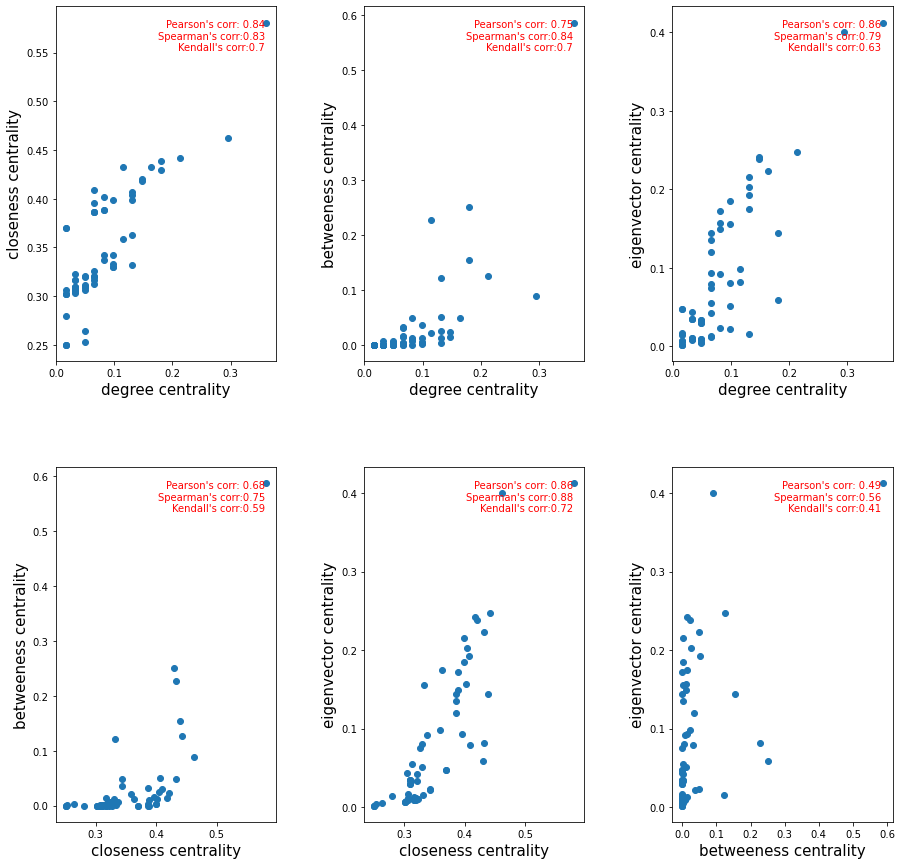

In [20]:
sct_cen(g1)

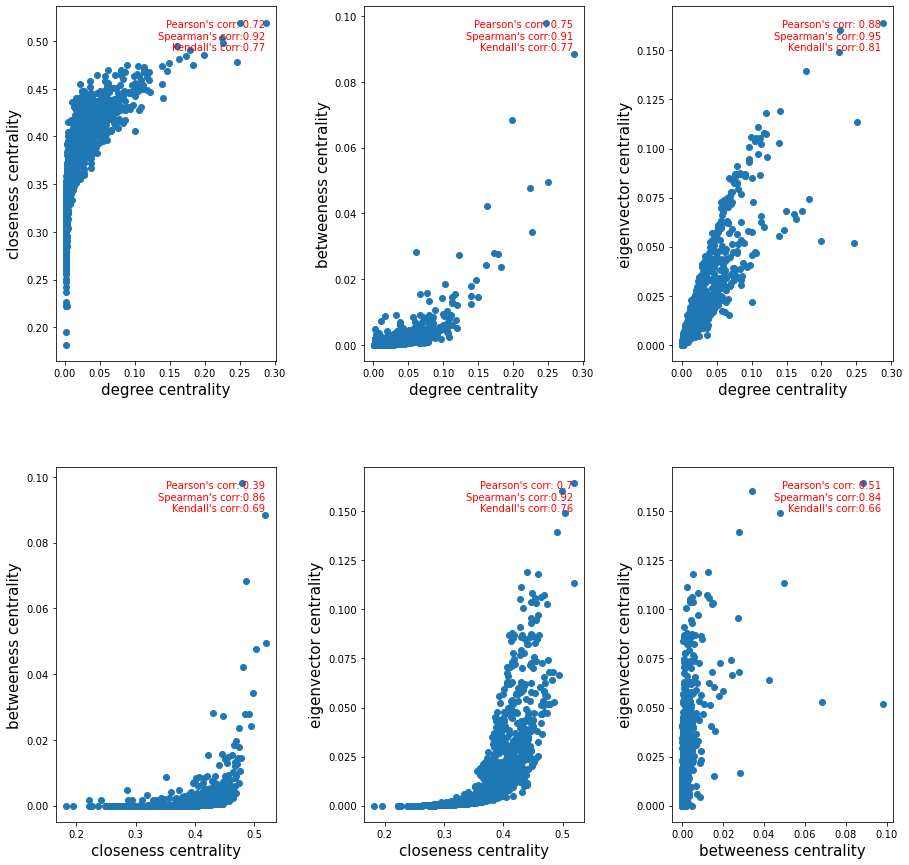

In [21]:
sct_cen(g2)

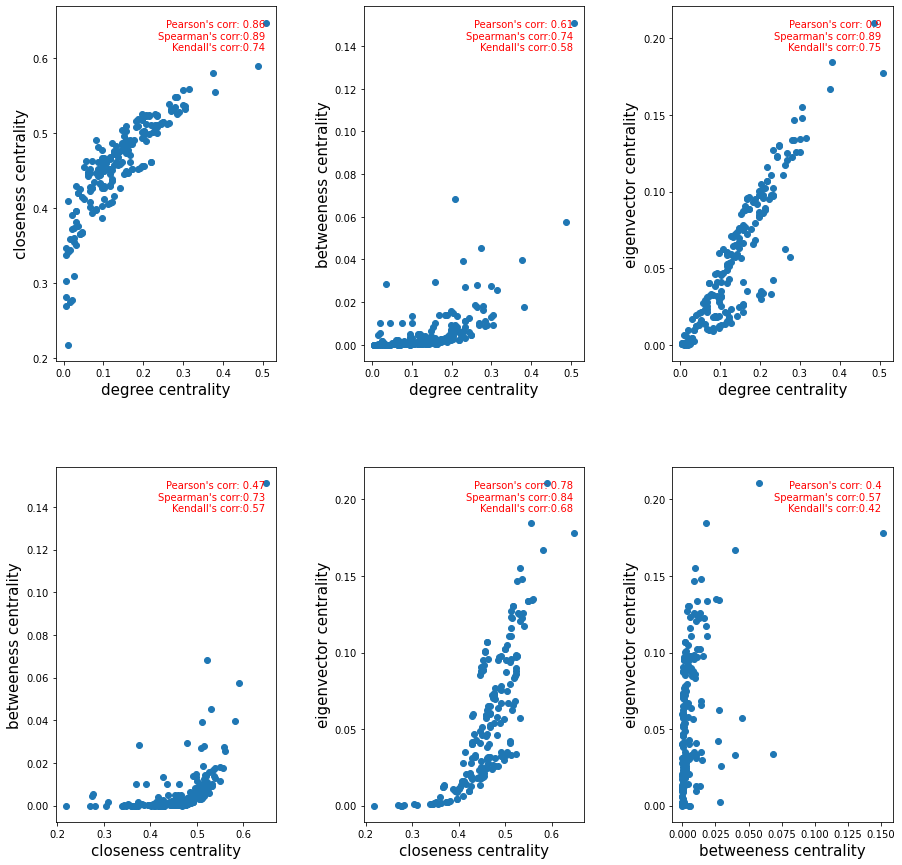

In [22]:
sct_cen(g3)

## Short explaination about Jazz collaborations data
### Degree centrality:
Degree centrality is a measure of popularity in a social network. In this case, it means how many musicians that one person had collaborated with in bands directly that performed between 1912 and 1940.
When degree centrality is large (e.g. Tim):
This means the Jazz musician Tim (node) had collabortion with more other Jazz musicians directly.
### Closeness centrality:
Closeness centrality shows how easily one musician can collaborate with all others.
When closeness centrality is large (e.g. Tim):
This means the Jazz musician Tim (node) can collaborate with whole other Jazz musicians(not particular one) more easily.
### Betweeness centrality:
Betweenness centrality measures control of information flow.
When betweeness centrality is large (e.g. Tim):
This means the Jazz musician Tim (node) is the collaboration center. When jazz musicians want to collaborate with others, Tim was also in the collaboration band.
### Eigenvector centrality:
When eigenvector centrality is large (e.g. Tim):
This means the Jazz musician Tim (node) is important if he had collaborated to other important musicians. We iterated the importance of the musicians Tim had worked with on Tim.

# A03.2 Centrality and randomisation

In [23]:
def randGra(g):
    grnd = nx.algorithms.smallworld.random_reference(g,niter =20, connectivity=False)
    return grnd

In [24]:
def sct_rand(g):
    grnd = randGra(g)
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    rdegree_cen = nx.degree_centrality(grnd)
    rclose_cen = nx.closeness_centrality(grnd)
    rbetween_cen = nx.betweenness_centrality(grnd)
    reigen_cen = nx.eigenvector_centrality(grnd)
    de = list(degree_cen.values())
    cl = list(close_cen.values())
    be = list(between_cen.values())
    ei = list(eigen_cen.values())
    rde = list(rdegree_cen.values())
    rcl = list(rclose_cen.values())
    rbe = list(rbetween_cen.values())
    rei = list(reigen_cen.values())
    p_de = sp.pearsonr(de,rde)[0]
    p_cl = sp.pearsonr(cl,rcl)[0]
    p_be = sp.pearsonr(be,rbe)[0]
    p_ei = sp.pearsonr(ei,rei)[0]
    s_de = sp.spearmanr(de,rde)[0]
    s_cl = sp.spearmanr(cl,rcl)[0]
    s_be = sp.spearmanr(be,rbe)[0]
    s_ei = sp.spearmanr(ei,rei)[0]
    k_de = sp.kendalltau(de,rde)[0]
    k_cl = sp.kendalltau(cl,rcl)[0]
    k_be = sp.kendalltau(be,rbe)[0]
    k_ei = sp.kendalltau(ei,rei)[0]
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace =0.4, hspace =0.3)
    ax1 = plt.subplot(2, 2, 1)
    plt.xlabel('degree centrality',fontsize=15)
    plt.ylabel('randomisation degree centrality',fontsize=15)
    ax1.text(0.95, 0.87, f"Pearson's corr: {round(p_de, 2)}\nSpearman's corr:{round(s_de, 2)}\nKendall's corr:{round(k_de, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='red')
    plt.scatter(de,rde)
    ax2 = plt.subplot(2, 2, 2)
    plt.xlabel('closeness centrality',fontsize=15)
    plt.ylabel('randomisation closeness centrality',fontsize=15)
    ax2.text(0.95, 0.87, f"Pearson's corr: {round(p_cl, 2)}\nSpearman's corr:{round(s_cl, 2)}\nKendall's corr:{round(k_cl, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='red')
    plt.scatter(cl,rcl)
    ax3 = plt.subplot(2, 2, 3)
    plt.xlabel('betweeness centrality',fontsize=15)
    plt.ylabel('randomisation betweeness centrality',fontsize=15)
    ax3.text(0.95, 0.87, f"Pearson's corr: {round(p_be, 2)}\nSpearman's corr:{round(s_be, 2)}\nKendall's corr:{round(k_be, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='red')
    plt.scatter(be,rbe)
    ax4 = plt.subplot(2, 2, 4)
    plt.xlabel('eigenvector centrality',fontsize=15)
    plt.ylabel('randomisation eigenvector centrality',fontsize=15)
    ax4.text(0.95, 0.87, f"Pearson's corr: {round(p_ei, 2)}\nSpearman's corr:{round(s_ei, 2)}\nKendall's corr:{round(k_ei, 2)}",
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='red')
    plt.scatter(ei,rei)

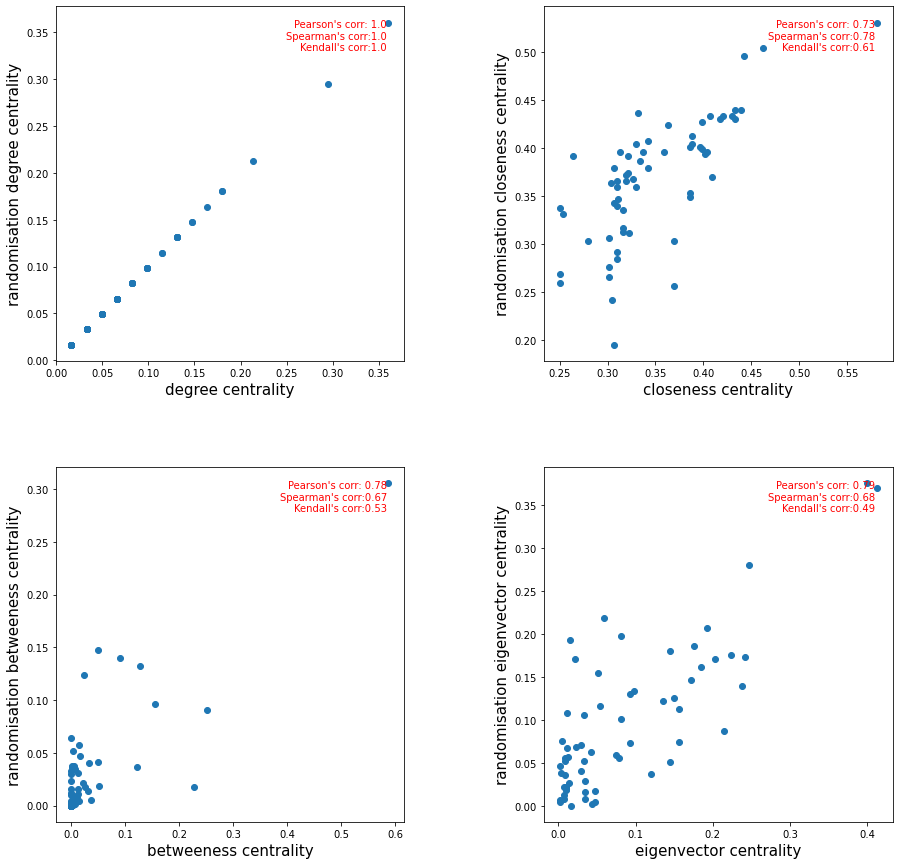

In [25]:
sct_rand(g1)

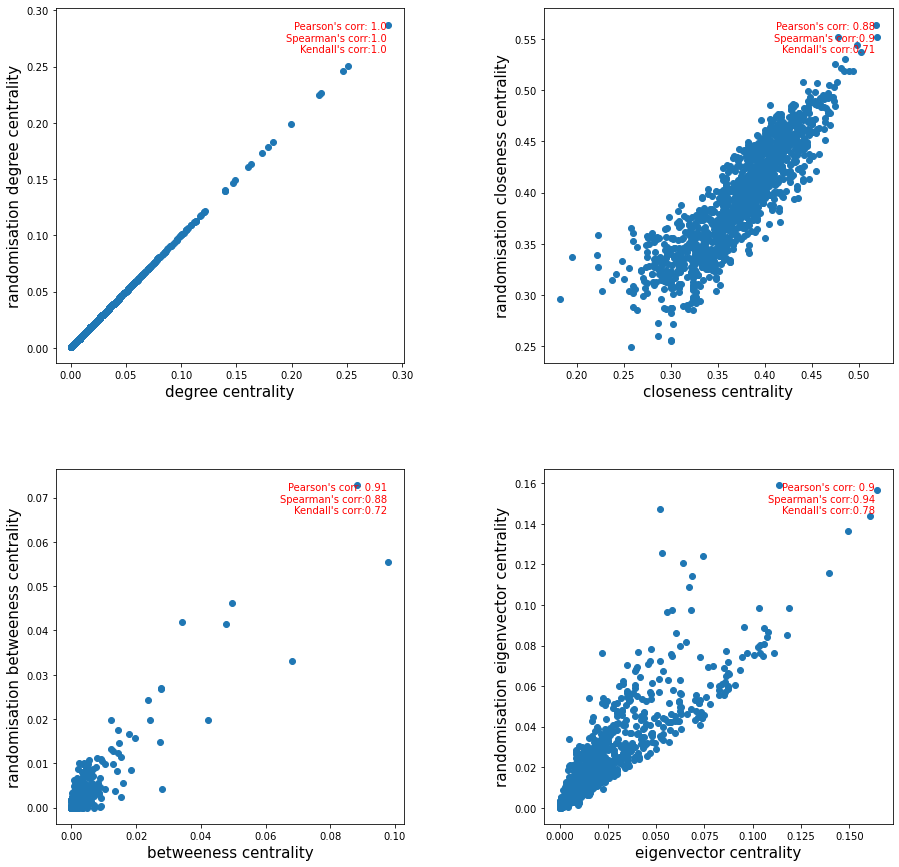

In [26]:
sct_rand(g2)

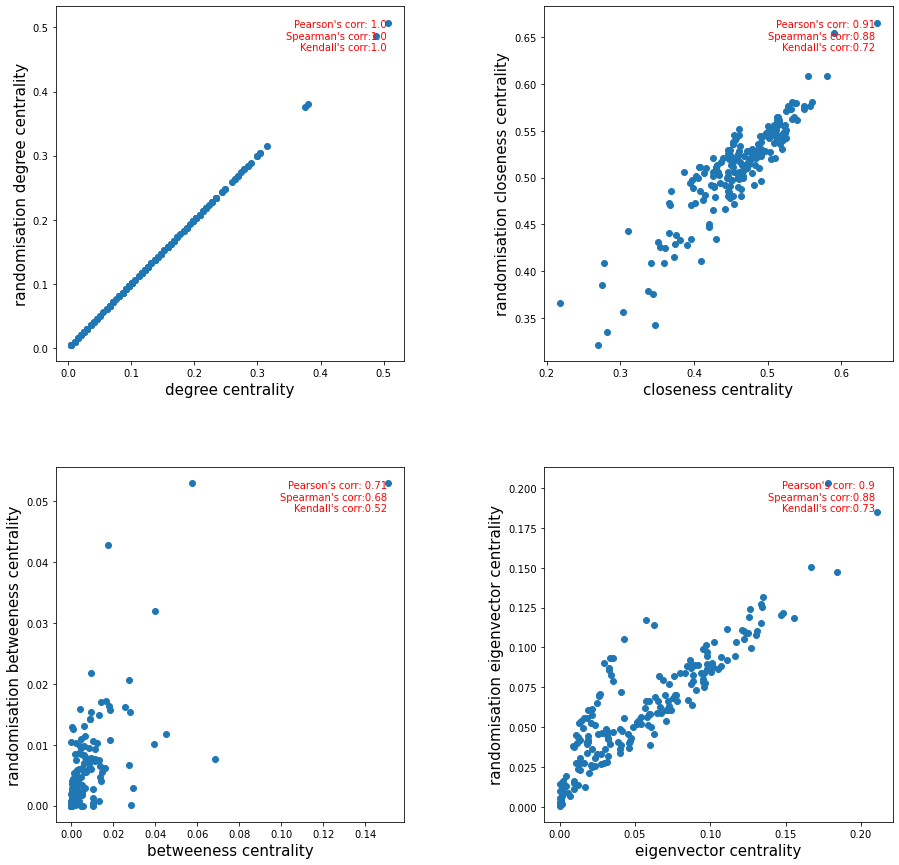

In [27]:
sct_rand(g3)

## Why do you get that result for degree centrality?
Because the degree-preserving network randomisation process only changes the edges' source and target, but doesn't change the number of links(degree) of each node. <br>
Moreover, the degree centrality is the local property, and it only depends on the node and its neighbours' quantity. <br>
Thus, after randomisation, the degree centrality doesn't change.

# A03.3 Page Rank

In [28]:
def sct_PR(g):
    pr1 = nx.pagerank(g4, alpha=0.1)
    pr2 = nx.pagerank(g4, alpha=0.2)
    pr3 = nx.pagerank(g4, alpha=0.3)
    pr4 = nx.pagerank(g4, alpha=0.4)
    pr5 = nx.pagerank(g4, alpha=0.5)
    pr6 = nx.pagerank(g4, alpha=0.6)
    pr7 = nx.pagerank(g4, alpha=0.7)
    pr8 = nx.pagerank(g4, alpha=0.8)
    pr85 = nx.pagerank(g4, alpha=0.85)
    pr9 = nx.pagerank(g4, alpha=0.9)
    pr95 = nx.pagerank(g4, alpha=0.95)
    pr99 = nx.pagerank(g4, alpha=0.99)
    pr1 = list(pr1.values())
    pr2 = list(pr2.values())
    pr3 = list(pr3.values())
    pr4 = list(pr4.values())
    pr5 = list(pr5.values())
    pr6 = list(pr6.values())
    pr7 = list(pr7.values())
    pr8 = list(pr8.values())
    pr85 = list(pr85.values())
    pr9 = list(pr9.values())
    pr95 = list(pr95.values())
    pr99 = list(pr99.values())
    s_1 = sp.spearmanr(pr85,pr1)[0]
    s_2 = sp.spearmanr(pr85,pr2)[0]
    s_3 = sp.spearmanr(pr85,pr3)[0]
    s_4 = sp.spearmanr(pr85,pr4)[0]
    s_5 = sp.spearmanr(pr85,pr5)[0]
    s_6 = sp.spearmanr(pr85,pr6)[0]
    s_7 = sp.spearmanr(pr85,pr7)[0]
    s_8 = sp.spearmanr(pr85,pr8)[0]
    s_9 = sp.spearmanr(pr85,pr9)[0]
    s_95 = sp.spearmanr(pr85,pr95)[0]
    s_99 = sp.spearmanr(pr85,pr99)[0]
    s = (s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_95,s_99)
    a = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99)
    plt.rcParams['figure.figsize'] = (5, 5)
    plt.scatter(a, s)
    plt.xlabel("Alpha")
    plt.ylabel("Spearman’s rank correlation")

In [29]:
sct_PR(g4)

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'